# Complete Notebook

## Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from tensorflow import keras
from keras.layers import Input, Lambda, Dense, Flatten, Dropout
from keras.models import Model
from tensorflow.keras.applications.resnet import ResNet152
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline 

## Initializing Parameters

In [3]:
IMAGE_SIZE = [256, 256, 3]

train_path = '/kaggle/input/covid19-chest-xray-processed-dataset/Dataset/Train'
test_path = '/kaggle/input/covid19-chest-xray-processed-dataset/Dataset/Test'
val_path = '/kaggle/input/covid19-chest-xray-processed-dataset/Dataset/Val'

## Data Augmentation

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)




# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/kaggle/input/covid19-chest-xray-processed-dataset/Dataset/Train',
                                                 target_size = (256, 256),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


test_set = test_datagen.flow_from_directory('/kaggle/input/covid19-chest-xray-processed-dataset/Dataset/Test',
                                            target_size = (256, 256),
                                            batch_size = 32,
                                            class_mode = 'categorical')


val_set = test_datagen.flow_from_directory('/kaggle/input/covid19-chest-xray-processed-dataset/Dataset/Val',
                                            target_size = (256, 256),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 3641 images belonging to 2 classes.
Found 455 images belonging to 2 classes.
Found 455 images belonging to 2 classes.


## ResNet152

In [5]:
base_model_resnet152 = ResNet152(input_shape=IMAGE_SIZE, weights='imagenet', include_top=False, pooling='max')

234700800/234698864 [==============================] - 2s 0us/step


In [6]:
for layer in base_model_resnet152.layers:
    layer.trainable = False

## Building Model

In [7]:
x = base_model_resnet152.output
x = Flatten()(x)

# x = Dense(1024, activation='relu')(x)
# x = Dropout(0.5)(x)
# prediction = Dense(2,activation = "sigmoid")(x)
# model_final = Model(base_model_eff0.input,prediction)

prediction = Dense(2, activation='softmax')(x)
final_model = Model(inputs=base_model_resnet152.input, outputs=prediction)

In [8]:
final_model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [9]:
final_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

## Training

In [10]:
history = final_model.fit_generator(
  training_set,
  validation_data=val_set,
  epochs=100,
  steps_per_epoch=len(training_set),
  validation_steps=len(val_set)
)

Epoch 1/100
114/114 [==============================] - 224s 2s/step - loss: 0.5016 - accuracy: 0.7601 - val_loss: 0.2706 - val_accuracy: 0.8901
Epoch 2/100
114/114 [==============================] - 171s 1s/step - loss: 0.2980 - accuracy: 0.9003 - val_loss: 0.1898 - val_accuracy: 0.9495
Epoch 3/100
114/114 [==============================] - 168s 1s/step - loss: 0.2336 - accuracy: 0.9269 - val_loss: 0.1864 - val_accuracy: 0.9319
Epoch 4/100
114/114 [==============================] - 170s 1s/step - loss: 0.2277 - accuracy: 0.9252 - val_loss: 0.1360 - val_accuracy: 0.9648
Epoch 5/100
114/114 [==============================] - 171s 2s/step - loss: 0.1890 - accuracy: 0.9370 - val_loss: 0.1241 - val_accuracy: 0.9604
Epoch 6/100
114/114 [==============================] - 168s 1s/step - loss: 0.1738 - accuracy: 0.9497 - val_loss: 0.1163 - val_accuracy: 0.9648
Epoch 7/100
114/114 [==============================] - 169s 1s/step - loss: 0.1740 - accuracy: 0.9459 - val_loss: 0.1431 - val_accuracy:

## Testing

In [11]:
print("Evaluating on test data ....")
results = final_model.evaluate(test_set, batch_size=32)
print("test loss, test acc:", results)

Evaluating on test data ....
15/15 [==============================] - 33s 2s/step - loss: 0.0553 - accuracy: 0.9758
test loss, test acc: [0.05531909689307213, 0.9758241772651672]


## Plotting 

In [12]:
history.history

{'loss': [0.4140602648258209,
  0.278064101934433,
  0.2304396778345108,
  0.21615609526634216,
  0.18692508339881897,
  0.1675005406141281,
  0.17230890691280365,
  0.1587521880865097,
  0.15579302608966827,
  0.15567858517169952,
  0.13827018439769745,
  0.14228074252605438,
  0.1398698389530182,
  0.14262910187244415,
  0.12587933242321014,
  0.12328702956438065,
  0.1286044418811798,
  0.14421412348747253,
  0.12133010476827621,
  0.11940349638462067,
  0.11576268821954727,
  0.13169807195663452,
  0.11085846275091171,
  0.1155892089009285,
  0.11590971797704697,
  0.1156928613781929,
  0.1078219786286354,
  0.09691347926855087,
  0.11026585847139359,
  0.10276374220848083,
  0.1009335070848465,
  0.10768595337867737,
  0.1072533056139946,
  0.10274983942508698,
  0.0937458947300911,
  0.09816789627075195,
  0.1064625009894371,
  0.09960272908210754,
  0.10522239655256271,
  0.09610258787870407,
  0.09605176746845245,
  0.1008540466427803,
  0.09805960208177567,
  0.090178363025188

### Accuracy vs Epochs

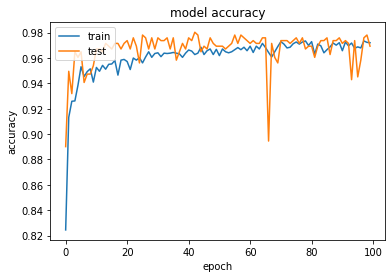

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


### Loss vs Epochs

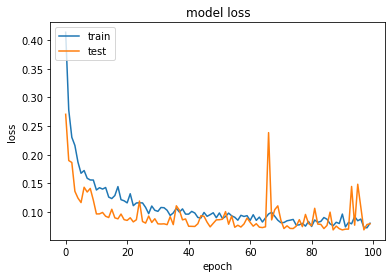

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()